# **India_GDP_1960-2022**

### **About this file**

Year= its Showing year of Indian GDP
GDP ( Billions of US $) = its showing GDP ( Billions of US $) per year
Per Capita= in this column per capita in rupees
Growth= showing changes in every year in %

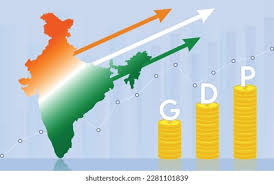

# **Introduction**

* The dataset contains GDP data for India from 1960 to 2022.

* Key columns include:

  * Year: The year of GDP recording.

  * GDP (Billions of US $): India's GDP per year in billions.

  * Per Capita: GDP per capita in rupees.

  * Growth (%): Yearly GDP growth percentage.

we will analyze GDP trends and apply machine learning for future predictions.

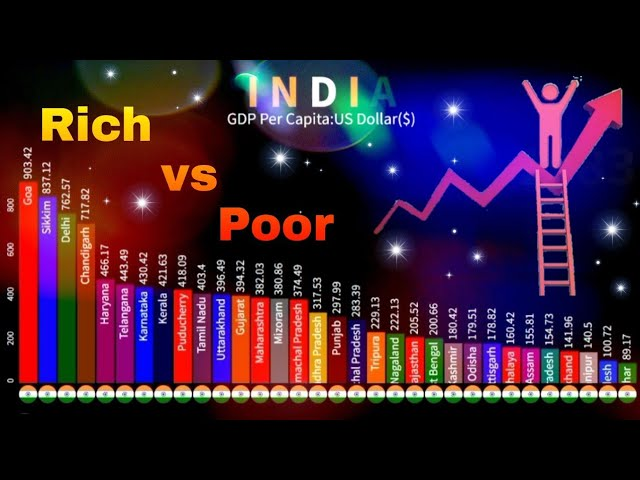

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **Data Loading and Exploration**

In [3]:
# load dataset
df=pd.read_csv("/content/India_GDP_1960-2022.csv")
df.head(10)

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
5,4.0,2017,2651.47,158480,6.8
6,5.0,2016,2294.8,138640,8.26
7,6.0,2015,2103.59,128480,8
8,7.0,2014,2039.13,125920,7.41
9,8.0,2013,1856.72,116000,6.39


The dataset loaded into a Pandas DataFrame.

# EDA

In [5]:
# droping unnecassary column and first row
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(index=0,inplace=True)
df.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
5,2017,2651.47,158480,6.8


In [6]:
# get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   India GDP - Historical Data    62 non-null     object
 1   India GDP - Historical Data.1  62 non-null     object
 2   India GDP - Historical Data.2  62 non-null     object
 3   India GDP - Historical Data.3  62 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [7]:
# check is there any null value
df.isnull().sum()

,0
India GDP - Historical Data,0
India GDP - Historical Data.1,0
India GDP - Historical Data.2,0
India GDP - Historical Data.3,0


In [8]:
# checking data types
df.dtypes

,0
India GDP - Historical Data,object
India GDP - Historical Data.1,object
India GDP - Historical Data.2,object
India GDP - Historical Data.3,object


In [10]:
# converting their data type to float
df['India GDP - Historical Data']=df['India GDP - Historical Data'].astype('float64')
df['India GDP - Historical Data.1']=df['India GDP - Historical Data.1'].astype('float64')
df['India GDP - Historical Data.2']=df['India GDP - Historical Data.2'].astype('float64')
df['India GDP - Historical Data.3']=df['India GDP - Historical Data.3'].astype('float64')
df.dtypes

,0
India GDP - Historical Data,float64
India GDP - Historical Data.1,float64
India GDP - Historical Data.2,float64
India GDP - Historical Data.3,float64


In [11]:
# rename columns
df.rename(columns={'India GDP - Historical Data': 'Year', 'India GDP - Historical Data.1': 'GDP in (Billion)$','India GDP - Historical Data.2':'Per Capita in rupees', 'India GDP - Historical Data.3':'Growth%'}, inplace=True)
df

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
1,2021.0,3173.40,182160.0,8.95
2,2020.0,2667.69,154640.0,-6.60
3,2019.0,2831.55,165760.0,3.74
4,2018.0,2702.93,159840.0,6.45
5,2017.0,2651.47,158480.0,6.80
...,...,...,...,...
58,1964.0,56.48,9280.0,7.45
59,1963.0,48.42,8080.0,5.99
60,1962.0,42.16,7200.0,2.93
61,1961.0,39.23,6800.0,3.72


In [12]:
# getting statical values
df.describe()

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
count,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,699.036452,48210.322581,5.007258
std,18.041619,867.228056,49386.668108,3.319231
min,1960.000000,37.030000,6560.000000,-6.600000
25%,1975.250000,100.327500,12920.000000,3.725000
50%,1990.500000,292.125000,27440.000000,5.620000
75%,2005.750000,910.290000,62720.000000,7.525000
max,2021.000000,3173.400000,182160.000000,9.630000


In [13]:
# check if there is any duplicated
df.duplicated().any()

False

**We observed :**
* The first few rows are displayed to check the structure.

* Data types of each column are examined.

* Summary statistics (mean, median, standard deviation) are calculated.

* Missing values are checked and handled if any are found.

# **Data Visualization**


<Axes: >

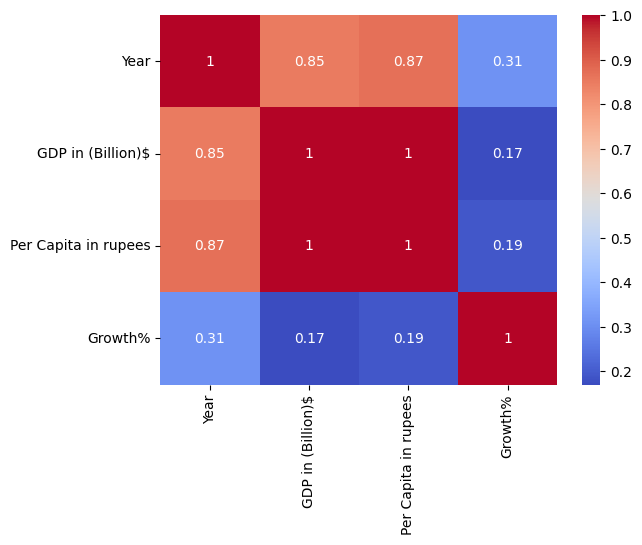

In [15]:
# look for correlations and visualize them
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'GDP in (Billion)$'}>],
       [<Axes: title={'center': 'Per Capita in rupees'}>,
        <Axes: title={'center': 'Growth%'}>]], dtype=object)

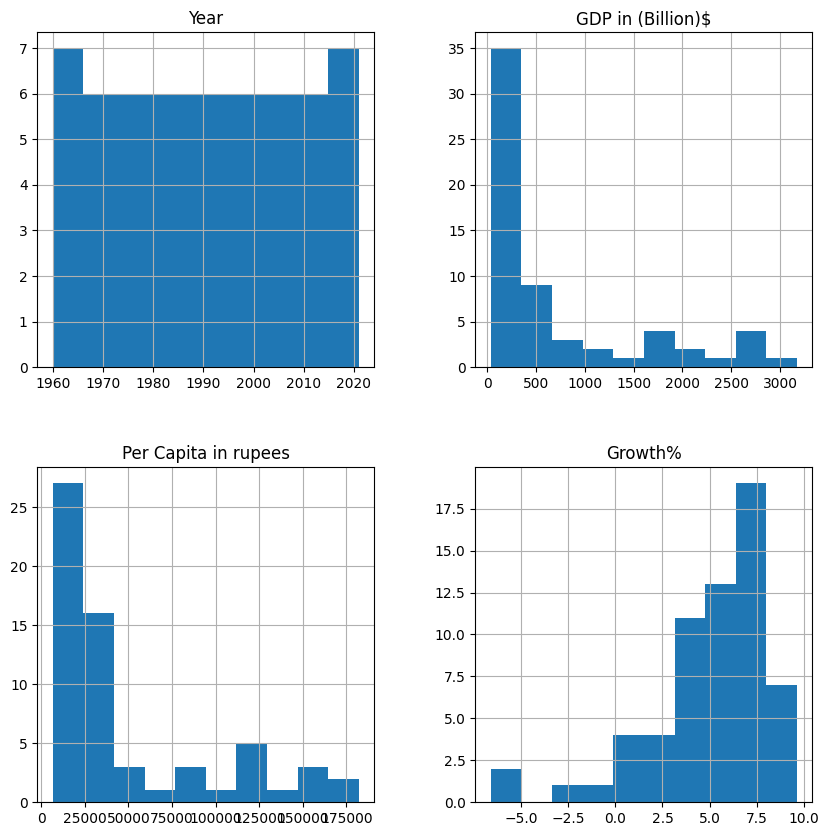

In [16]:
# look for features' histograms
df.hist(figsize=(10,10))

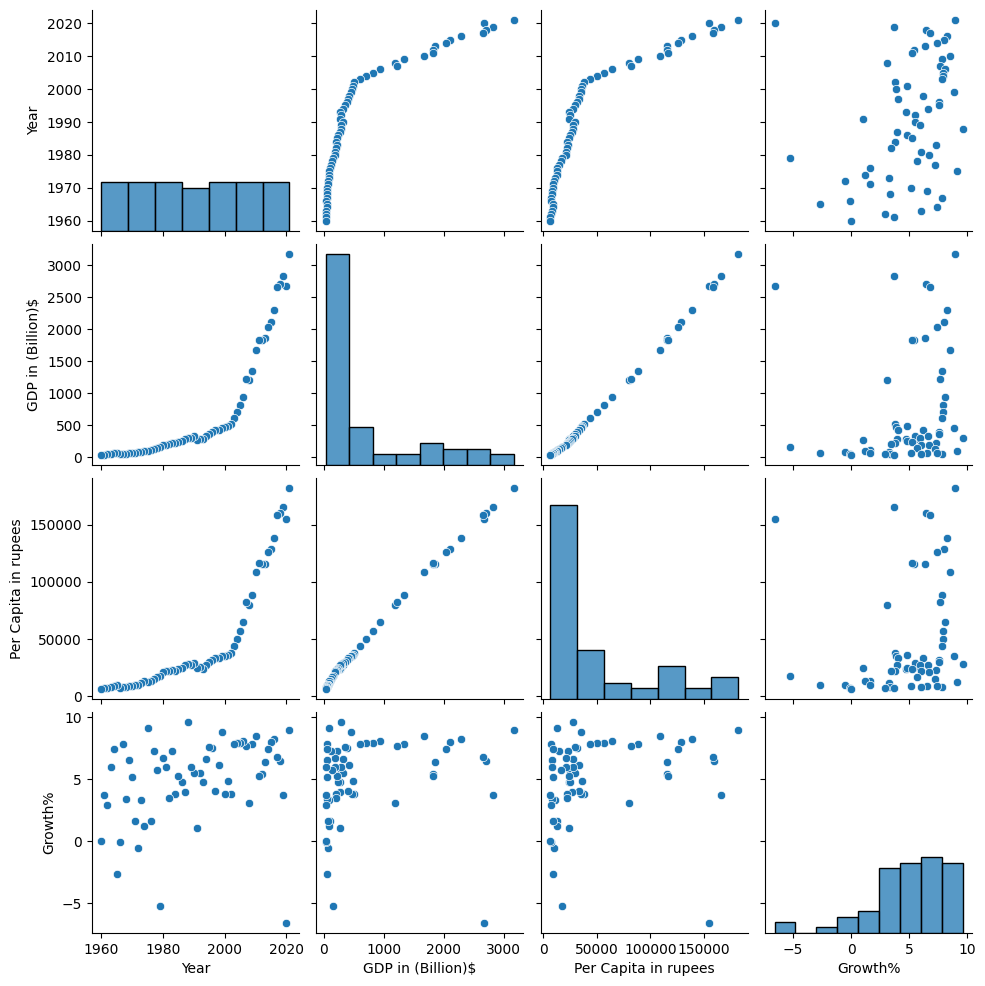

In [17]:
# look for relation graphs
sns.pairplot(df)

Text(0.5, 1.0, 'Year vs GPD')

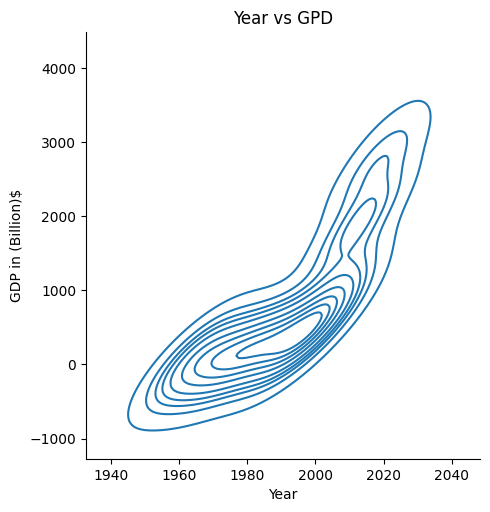

In [18]:
sns.displot(df, x="Year" , y="GDP in (Billion)$" , kind="kde")
plt.xlabel('Year')
plt.ylabel('GDP in (Billion)$')
plt.title('Year vs GPD')

Text(0.5, 1.0, 'Year vs Per Capita in rupees')

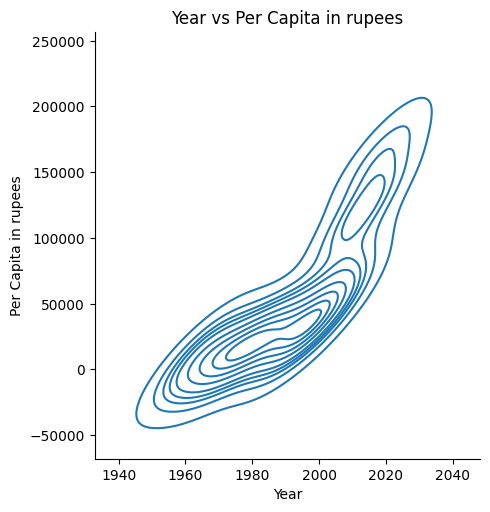

In [19]:
sns.displot(df, x="Year" , y="Per Capita in rupees" , kind="kde")
plt.xlabel('Year')
plt.ylabel('Per Capita in rupees')
plt.title('Year vs Per Capita in rupees')

Text(0.5, 1.0, 'PER CAPITA vs GDP')

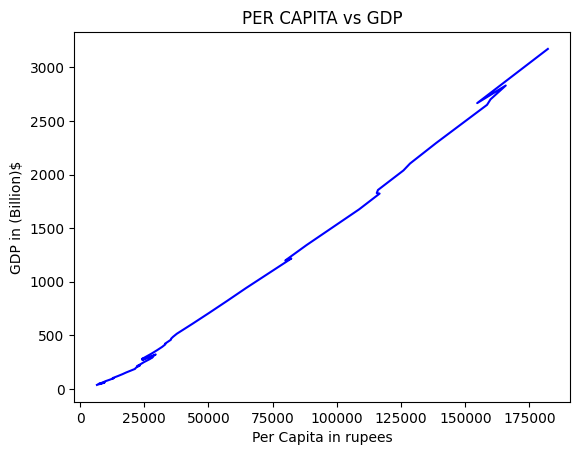

In [20]:
plt.plot(df['Per Capita in rupees'],df['GDP in (Billion)$'],color='blue', linestyle='-')
plt.xlabel('Per Capita in rupees')
plt.ylabel('GDP in (Billion)$')
plt.title('PER CAPITA vs GDP')

Text(0.5, 1.0, 'Year vs Growth')

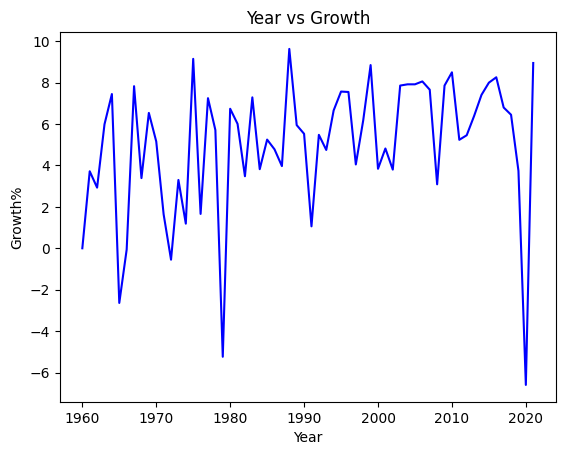

In [21]:
plt.plot(df['Year'],df['Growth%'],color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Growth%')
plt.title('Year vs Growth')

# **Machine Learning Model Implementation**

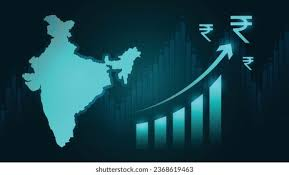

# **split the data**

In [22]:
X=df[['Year','Per Capita in rupees']]
y=df['GDP in (Billion)$']

In [23]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Linear Regression**

In [34]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print("Accuracy of Logistic Regression: {}%".format(model.score(X_test, y_test) * 100 ), "%\n")

# RMSE
from sklearn.metrics import mean_squared_error
# calculate MSE then take square root to get RMSE
mse = mean_squared_error(y_test, model_pred)  # Calculate MSE
rmse = mse**0.5
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model_pred)
print("R-squared:", r2)




Accuracy of Logistic Regression: 99.89267198804248% %

Root Mean Squared Error (RMSE): 32.60441586409751
R-squared: 0.9989267198804248


# **Decision Tree Regression**

In [32]:
# Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy of Decision Tree: {}%".format(model.score(X_test, y_test) * 100 ), "%\n")

# RMSE
from sklearn.metrics import mean_squared_error
# calculate MSE then take square root to get RMSE
mse = mean_squared_error(y_test, model_pred)  # Calculate MSE
rmse = mse**0.5
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model_pred)
print("R-squared:", r2)



Accuracy of Decision Tree: 98.57206393026432% %

Root Mean Squared Error (RMSE): 118.92530212118606
R-squared: 0.9857206393026432


# **RandomForestRegressor**

In [33]:
# RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy of Random Forest: {}%".format(model.score(X_test, y_test) * 100 ), "%\n")

# RMSE
from sklearn.metrics import mean_squared_error
# calculate MSE then take square root to get RMSE
mse = mean_squared_error(y_test, model_pred)  # Calculate MSE
rmse = mse**0.5
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model_pred)
print("R-squared:", r2)


Accuracy of Random Forest: 98.6866013956319% %

Root Mean Squared Error (RMSE): 114.05600525443414
R-squared: 0.986866013956319


# **Observations and Insights**

* India's GDP has shown a steady increase over the decades.

* Significant dips in GDP growth coincide with economic crises and external factors.

* The per capita income has also grown alongside GDP.

* The machine learning model provides a reasonable prediction of future GDP trends but may require more features for improved accuracy.

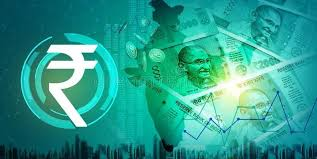

#  **Advanced Forecasting Models Implementation**

implementation of advanced models such as ARIMA, LSTM, and XGBoost

# **ARIMA Model**

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
model = ARIMA(df['GDP in (Billion)$'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=10)
print(forecast)

63    32.905133
64    28.826655
65    24.794042
66    20.806781
67    16.864360
68    12.966275
69     9.112028
70     5.301125
71     1.533080
72    -2.192589
Name: predicted_mean, dtype: float64


# **LSTM Model**

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Prepare data for LSTM
X = df['Year'].values
y = df['GDP in (Billion)$'].values
X = np.reshape(X, (len(X), 1, 1))

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Forecast
forecast = model.predict(X[-10:])
print(forecast)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
[[215.91626]
 [215.8066 ]
 [215.69693]
 [215.58728]
 [215.47763]
 [215.36797]
 [215.2583 ]
 [215.14865]
 [215.03899]
 [214.92932]]


# **XGBoost Model**

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['Year', 'Per Capita in rupees']]
y = df['GDP in (Billion)$']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 14407.111119717827


# **Observations and Insights**

* India's GDP has shown a steady increase over the decades.

* Significant dips in GDP growth coincide with economic crises and external factors.

* The per capita income has also grown alongside GDP.

* The machine learning models provide a reasonable prediction of future GDP trends.

* Advanced models like ARIMA capture time series patterns well, LSTM leverages deep learning for sequential data, and XGBoost performs well with structured data.

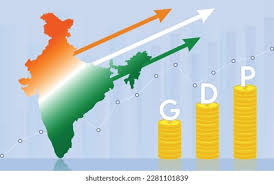